<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# classification of Reuters dataset into 46 labels
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

In [31]:
(xtrain, ytrain),(xtest, ytest)=reuters.load_data(num_words=10000)

#print(xtrain[0])

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in xtrain[0]])
# Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
#print(decoded_newswire)

# vectorize the data
def vectorize(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize(xtrain)
x_test = vectorize(xtest)

import sys
np.set_printoptions(threshold=sys.maxsize)  # to print max
#print(x_train[0])
#print(ytrain[0])

y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

#print(y_train[0])


In [33]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10000,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=1, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 46)                1518      
Total params: 1,285,774
Trainable params: 1,285,774
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
57/57 [==============================] - 2s 30ms/step - loss: 1.8391 - accuracy: 0.6308 - val_loss: 1.2606 - val_accuracy: 0.7234
Epoch 2/20
57/57 [==============================] - 2s 27ms/step - loss: 0.9060 - accuracy: 0.8039 - val_loss: 1.0604 - val_accuracy: 0.7702
Epoch 3/20
57/57 [==============================] - 2s 27ms/step - loss: 0.5862 - accuracy: 

In [29]:
y_pred = np.argmax(model.predict(x_test), axis=0)

pred_error = np.sum(y_pred != ytest)/len(ytest) * 100

print(ytest[0:5])
print(y_pred[0:5])

print(pred_error)

[ 3 10  1  4  4]
[1696 1013 1634  105   69]
0.04452359750667854


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.2984030667692423
Training and validation loss    :  0.2984030667692423 1.2242771685123444
Training and validation accuracy:  0.928190678358078 0.7786032289266587
71/71 [==============================] - 0s 3ms/step - loss: 1.6372 - accuracy: 0.7685
accuracy : [1.6371662616729736, 0.7684773206710815]


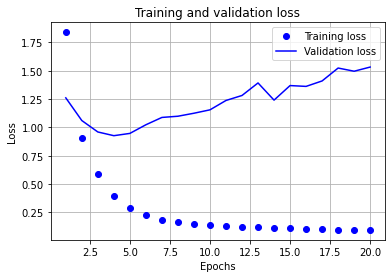

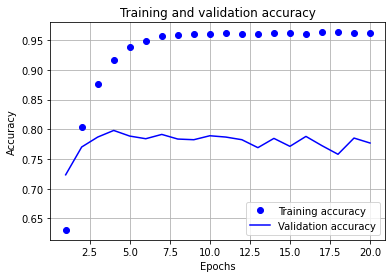

In [48]:
print(history.history.keys())
loss = history.history['loss']
print(np.mean(loss))
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

print('Training and validation loss    : ', np.mean(loss), np.mean(val_loss))
print('Training and validation accuracy: ', np.mean(accuracy), np.mean(val_accuracy))

y_pred = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print('accuracy :', score)

epochs = range(1, len(loss)+1)

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
